In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.utils import np_utils
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.svm import SVC  
from sklearn.svm import SVR
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import LabelEncoder
from keras.layers.core import Dense
from keras.models import Model
from keras.layers import concatenate,average,add,multiply
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras.layers import Flatten,Embedding,Reshape
from keras.layers import Input
from keras.callbacks import ModelCheckpoint
from keras.utils import plot_model
import tensorflow as tf

In [3]:
data_dir="/home/james/data/Malware"
data_csv=data_dir + "/train.csv"


In [4]:
df = pd.read_csv(data_csv,low_memory=False)

In [5]:
# Get rid of bad columns
# reference = https://www.kaggle.com/jiegeng94/everyone-do-this-at-the-beginning
remove_cols = ['DefaultBrowsersIdentifier','PuaMode', 'Census_ProcessorClass', 'Census_IsWIMBootEnabled', 'IsBeta', 'Census_IsFlightsDisabled', 'Census_IsFlightingInternal', 'AutoSampleOptIn', 'Census_ThresholdOptIn', 'SMode', 'Census_IsPortableOperatingSystem', 'Census_DeviceFamily', 'UacLuaenable', 'Census_IsVirtualDevice', 'Platform', 'Census_OSSkuName', 'Census_OSInstallLanguageIdentifier', 'Processor']

df.drop(remove_cols, axis=1, inplace=True)

In [6]:
# Get Labels
labels = df['HasDetections']
IDS = df['MachineIdentifier']

It can be seen that the label categories are almost equal.

In [7]:
# Remove the labels from the dataframe
df = df.drop(['HasDetections'], axis=1)
df = df.drop(['MachineIdentifier'], axis=1)

# Get Columns in Variable
print(list(df.columns.values))
columns = list(df.columns.values)


['ProductName', 'EngineVersion', 'AppVersion', 'AvSigVersion', 'RtpStateBitfield', 'IsSxsPassiveMode', 'AVProductStatesIdentifier', 'AVProductsInstalled', 'AVProductsEnabled', 'HasTpm', 'CountryIdentifier', 'CityIdentifier', 'OrganizationIdentifier', 'GeoNameIdentifier', 'LocaleEnglishNameIdentifier', 'OsVer', 'OsBuild', 'OsSuite', 'OsPlatformSubRelease', 'OsBuildLab', 'SkuEdition', 'IsProtected', 'IeVerIdentifier', 'SmartScreen', 'Firewall', 'Census_MDC2FormFactor', 'Census_OEMNameIdentifier', 'Census_OEMModelIdentifier', 'Census_ProcessorCoreCount', 'Census_ProcessorManufacturerIdentifier', 'Census_ProcessorModelIdentifier', 'Census_PrimaryDiskTotalCapacity', 'Census_PrimaryDiskTypeName', 'Census_SystemVolumeTotalCapacity', 'Census_HasOpticalDiskDrive', 'Census_TotalPhysicalRAM', 'Census_ChassisTypeName', 'Census_InternalPrimaryDiagonalDisplaySizeInInches', 'Census_InternalPrimaryDisplayResolutionHorizontal', 'Census_InternalPrimaryDisplayResolutionVertical', 'Census_PowerPlatformRol

In [8]:
#for column in columns:
#    if column == "MachineIdentifier":
#        next
#    if column == "HasDetections":
#        next
#    df[column] = pd.factorize(df[column])[0]
    

In [9]:
print(df.shape)

(8921483, 63)


In [10]:
pd.options.display.float_format = '{:,.4f}'.format
sk_df = pd.DataFrame([{'column': c, 'uniq': df[c].nunique(), 'skewness': df[c].value_counts(normalize=True).values[0] * 100} for c in df.columns])
sk_df = sk_df.sort_values('skewness', ascending=False)
sk_df

,column,skewness,uniq
0,ProductName,98.9356,6
9,HasTpm,98.7971,2
5,IsSxsPassiveMode,98.2666,2
24,Firewall,97.8583,2
8,AVProductsEnabled,97.3984,6
4,RtpStateBitfield,97.3262,7
15,OsVer,96.7613,58
59,Census_IsPenCapable,96.1929,2
21,IsProtected,94.5624,2
60,Census_IsAlwaysOnAlwaysConnectedCapable,94.2581,2


In [11]:
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

Census_InternalBatteryType                          0.7105
SmartScreen                                         0.3561
OrganizationIdentifier                              0.3084
CityIdentifier                                      0.0365
Wdft_RegionIdentifier                               0.0340
Wdft_IsGamer                                        0.0340
Census_InternalBatteryNumberOfCharges               0.0301
Census_FirmwareManufacturerIdentifier               0.0205
Census_FirmwareVersionIdentifier                    0.0179
Census_OEMModelIdentifier                           0.0115
Census_OEMNameIdentifier                            0.0107
Firewall                                            0.0102
Census_TotalPhysicalRAM                             0.0090
Census_IsAlwaysOnAlwaysConnectedCapable             0.0080
IeVerIdentifier                                     0.0066
Census_PrimaryDiskTotalCapacity                     0.0059
Census_SystemVolumeTotalCapacity                    0.00

In [12]:
df.Census_InternalBatteryType.value_counts()

lion        2028256
li-i         245617
#            183998
lip           62099
liio          32635
li p           8383
li             6708
nimh           4614
real           2744
bq20           2302
pbac           2274
vbox           1454
unkn            533
lgi0            399
lipo            198
lhp0            182
4cel            170
lipp             83
ithi             79
batt             60
ram              35
virt             33
bad              33
pad0             22
lit              16
ca48             16
a132             10
ots0              9
lai0              8
ÿÿÿÿ              8
             ...   
l&#TAB#          1
a130              1
3500              1
li               1
÷ÿóö              1
sams              1
sail              1
@i              1
8                 1
h4°s              1
2337              1
d                 1
l                1
cl53              1
4ion              1
˙˙˙              1
lgl0              1
ion              1
ip               1


In [13]:
trans_dict = {
    '˙˙˙': 'unknown', 'unkn': 'unknown', np.nan: 'unknown'
}
df.replace({'Census_InternalBatteryType': trans_dict}, inplace=True)



In [14]:
trans_dict = {
    'off': 'Off', '&#x02;': '2', '&#x01;': '1', 'on': 'On', 'requireadmin': 'RequireAdmin', 'OFF': 'Off', 
    'Promt': 'Prompt', 'requireAdmin': 'RequireAdmin', 'prompt': 'Prompt', 'warn': 'Warn', 
    '00000000': '0', '&#x03;': '3', np.nan: 'NoExist'
}
df.replace({'SmartScreen': trans_dict}, inplace=True)



In [15]:
df.SmartScreen.value_counts()

RequireAdmin    4316194
NoExist         3177011
ExistsNotSet    1046183
Off              187907
Warn             135484
Prompt            34536
Block             22533
On                  878
2                   416
1                   335
0                     4
Enabled               1
3                     1
Name: SmartScreen, dtype: int64

In [16]:
df.SmartScreen.isnull().sum()

0

In [17]:
df.OrganizationIdentifier.value_counts()

27.0000    4196457
18.0000    1764175
48.0000      63845
50.0000      45502
11.0000      19436
37.0000      19398
49.0000      13627
46.0000      10974
14.0000       4713
32.0000       4045
36.0000       3909
52.0000       3043
33.0000       2896
2.0000        2595
5.0000        1990
40.0000       1648
28.0000       1591
4.0000        1385
10.0000       1083
51.0000        917
20.0000        915
1.0000         893
8.0000         723
22.0000        418
39.0000        413
6.0000         412
31.0000        398
21.0000        397
47.0000        385
3.0000         331
16.0000        242
19.0000        172
26.0000        160
44.0000        150
29.0000        135
42.0000        132
7.0000          98
41.0000         77
45.0000         73
30.0000         64
43.0000         60
35.0000         32
23.0000         20
15.0000         13
25.0000         12
12.0000          7
34.0000          2
38.0000          1
17.0000          1
Name: OrganizationIdentifier, dtype: int64

In [18]:
df.replace({'OrganizationIdentifier': {np.nan: 0}}, inplace=True)

In [19]:
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

CityIdentifier                                      0.0365
Wdft_RegionIdentifier                               0.0340
Wdft_IsGamer                                        0.0340
Census_InternalBatteryNumberOfCharges               0.0301
Census_FirmwareManufacturerIdentifier               0.0205
Census_FirmwareVersionIdentifier                    0.0179
Census_OEMModelIdentifier                           0.0115
Census_OEMNameIdentifier                            0.0107
Firewall                                            0.0102
Census_TotalPhysicalRAM                             0.0090
Census_IsAlwaysOnAlwaysConnectedCapable             0.0080
IeVerIdentifier                                     0.0066
Census_PrimaryDiskTotalCapacity                     0.0059
Census_SystemVolumeTotalCapacity                    0.0059
Census_InternalPrimaryDiagonalDisplaySizeInInches   0.0053
Census_InternalPrimaryDisplayResolutionHorizontal   0.0053
Census_InternalPrimaryDisplayResolutionVertical     0.00

In [20]:
df.fillna(0, inplace=True)

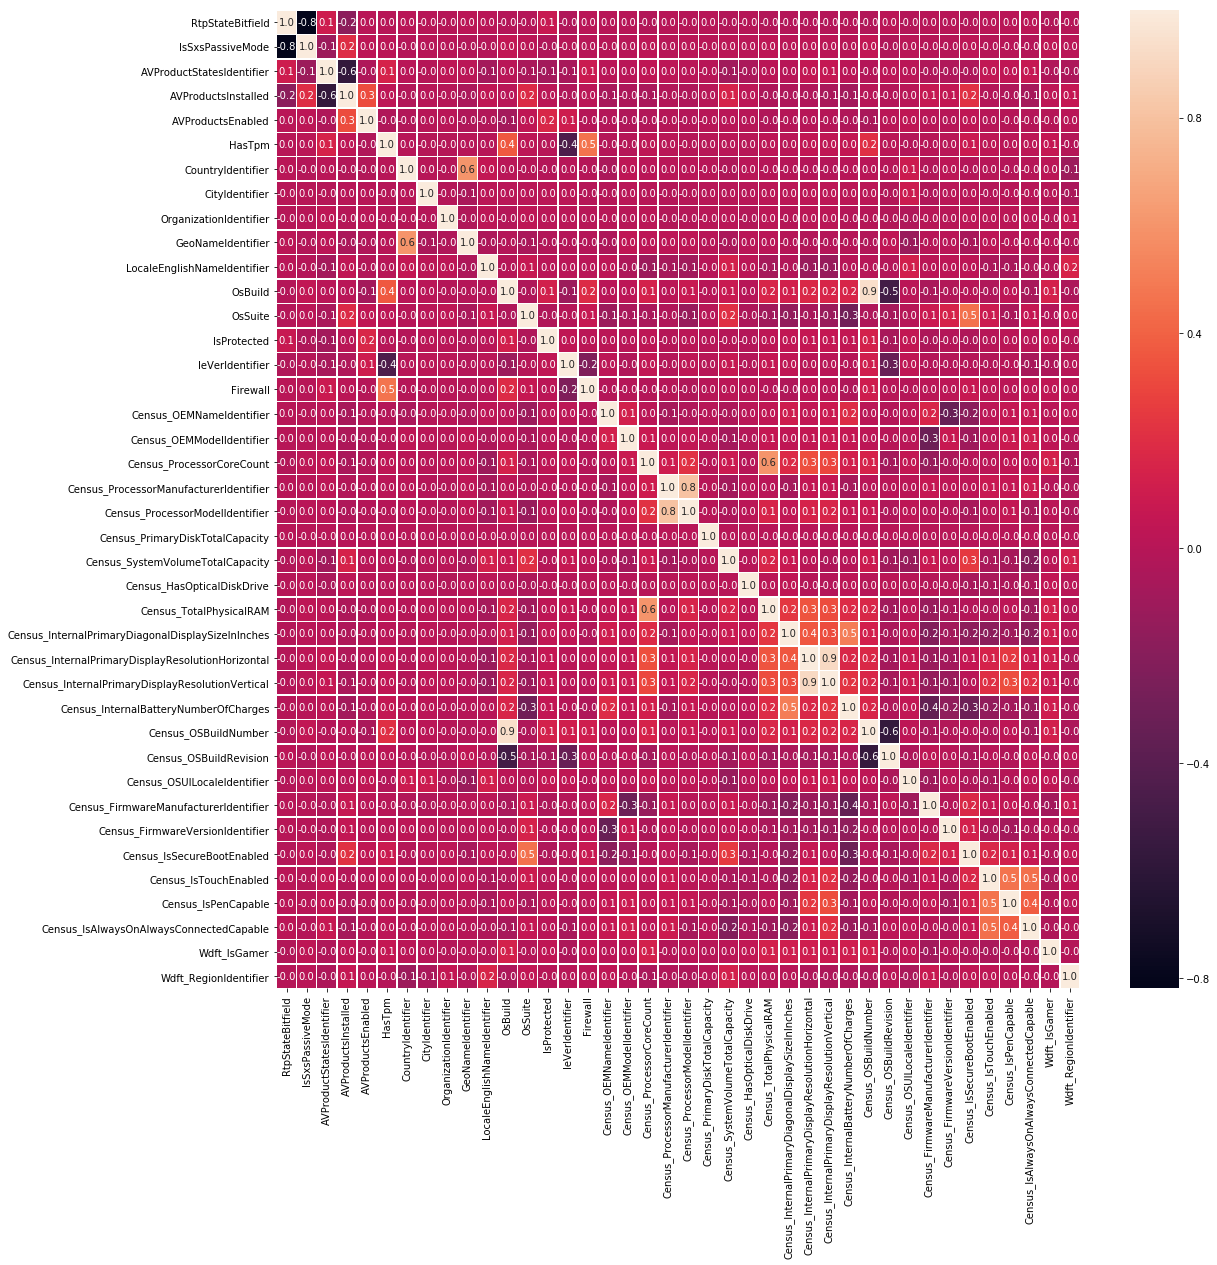

In [21]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [22]:
for column in columns:
    if column == "MachineIdentifier":
        next
    if column == "HasDetections":
        next
    df[column] = pd.factorize(df[column])[0]

In [23]:
clf = ExtraTreesClassifier(n_estimators=50,n_jobs=3,max_depth=10).fit(df, labels)

In [24]:
clf.feature_importances_
rfmodel = SelectFromModel(clf, prefit=True)
rf_features = rfmodel.get_support(indices=True)

for i in range(len(rf_features)):
    print(rf_features[i],":",columns[rf_features[i]])
    
rf_df = rfmodel.transform(df)

1 : EngineVersion
2 : AppVersion
3 : AvSigVersion
4 : RtpStateBitfield
5 : IsSxsPassiveMode
7 : AVProductsInstalled
8 : AVProductsEnabled
21 : IsProtected
23 : SmartScreen
44 : Census_OSArchitecture
49 : Census_OSInstallTypeName
53 : Census_ActivationChannel
58 : Census_IsTouchEnabled
60 : Census_IsAlwaysOnAlwaysConnectedCapable
61 : Wdft_IsGamer


In [25]:
varkmodel = VarianceThreshold(1000).fit(df)
vark_features = varkmodel.get_support(indices=True)
print(len(vark_features))
for i in range(len(vark_features)):
    print(vark_features[i],":",columns[vark_features[i]])

15
3 : AvSigVersion
6 : AVProductStatesIdentifier
10 : CountryIdentifier
11 : CityIdentifier
19 : OsBuildLab
26 : Census_OEMNameIdentifier
27 : Census_OEMModelIdentifier
30 : Census_ProcessorModelIdentifier
31 : Census_PrimaryDiskTotalCapacity
33 : Census_SystemVolumeTotalCapacity
35 : Census_TotalPhysicalRAM
37 : Census_InternalPrimaryDiagonalDisplaySizeInInches
42 : Census_InternalBatteryNumberOfCharges
43 : Census_OSVersion
56 : Census_FirmwareVersionIdentifier


In [26]:
selectkmodel = SelectKBest(chi2, k=16).fit(df, labels)

In [27]:
selectk_features = selectkmodel.get_support(indices=True)

In [28]:
for i in range(len(selectk_features)):
    print(selectk_features[i],":",columns[selectk_features[i]])


3 : AvSigVersion
6 : AVProductStatesIdentifier
11 : CityIdentifier
19 : OsBuildLab
26 : Census_OEMNameIdentifier
27 : Census_OEMModelIdentifier
30 : Census_ProcessorModelIdentifier
31 : Census_PrimaryDiskTotalCapacity
33 : Census_SystemVolumeTotalCapacity
35 : Census_TotalPhysicalRAM
37 : Census_InternalPrimaryDiagonalDisplaySizeInInches
38 : Census_InternalPrimaryDisplayResolutionHorizontal
39 : Census_InternalPrimaryDisplayResolutionVertical
42 : Census_InternalBatteryNumberOfCharges
47 : Census_OSBuildRevision
56 : Census_FirmwareVersionIdentifier


In [29]:
scaler = StandardScaler()
scaler.fit(df)
df = scaler.transform(df)


/usr/local/Anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/Anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [30]:
rf_df = rfmodel.transform(df)
print(rf_df.shape)

var_df = varkmodel.transform(df)
print(var_df.shape)

sk_df = selectkmodel.transform(df)
print(sk_df.shape)

(8921483, 15)
(8921483, 15)
(8921483, 16)


In [31]:
# Create Test and Training Sets

rfx_train, rfx_test, rfy_train, rfy_test = train_test_split(rf_df, labels, test_size=0.3, random_state=42,shuffle=False)
#rfscaler = StandardScaler()
#rfscaler.fit(rfx_train)
#rfx_train = rfscaler.transform(rfx_train)
#rfx_test = rfscaler.transform(rfx_test)

varx_train, varx_test, vary_train, vary_test = train_test_split(var_df, labels, test_size=0.3, random_state=42,shuffle=False)
#varscaler = StandardScaler()
#varscaler.fit(varx_train)
#varx_train = varscaler.transform(varx_train)
#varx_test = rfscaler.transform(varx_test)

skx_train, skx_test, sky_train, sky_test = train_test_split(sk_df, labels, test_size=0.3, random_state=42,shuffle=False)
#skscaler = StandardScaler()
#skscaler.fit(skx_train)
#skx_train = varscaler.transform(skx_train)
#skx_test = rfscaler.transform(skx_test)

print(rfx_train.shape,varx_train.shape,skx_train.shape)
print(rfx_test.shape,varx_test.shape,skx_test.shape)
print(rfy_train.shape,vary_train.shape,sky_train.shape)
print(rfy_test.shape,vary_test.shape,sky_test.shape)


(6245038, 15) (6245038, 15) (6245038, 16)
(2676445, 15) (2676445, 15) (2676445, 16)
(6245038,) (6245038,) (6245038,)
(2676445,) (2676445,) (2676445,)


In [103]:
rf_shape = rfx_train.shape[1]
var_shape = varx_train.shape[1]
skx_shape = skx_train.shape[1]

# Three Inputs
inputA = Input(shape=(rf_shape,))
inputB = Input(shape=(var_shape,))
inputC = Input(shape=(skx_shape,))


# The First Branch
x = Dense(32, activation="relu")(inputA)
x = Dense(32, activation="relu")(x)
x = Dense(24, activation="relu")(x)
x = Dense(24, activation="relu")(x)
x = Dense(16, activation="relu")(x)
x = Dense(16, activation="relu")(x)
x = Dense(16, activation="relu")(x)
x = Dense(8, activation="relu")(x)
x = Dense(8, activation="relu")(x)
x = Dense(8, activation="relu")(x)
x = Model(inputs=inputA, outputs=x)
 
# The Second Branch
y = Dense(32, activation="relu")(inputB)
y = Dense(32, activation="relu")(y)
y = Dense(24, activation="relu")(y)
y = Dense(24, activation="relu")(y)
y = Dense(16, activation="relu")(y)
y = Dense(16, activation="relu")(y)
y = Dense(16, activation="relu")(y)
y = Dense(8, activation="relu")(y)
y = Dense(8, activation="relu")(y)
y = Dense(8, activation="relu")(y)
y = Model(inputs=inputB, outputs=y)
 
# The Third Branch
z = Dense(32, activation="relu")(inputC)
z = Dense(32, activation="relu")(z)
z = Dense(24, activation="relu")(z)
z = Dense(24, activation="relu")(z)
z = Dense(16, activation="relu")(z)
z = Dense(16, activation="relu")(z)
z = Dense(16, activation="relu")(z)
z = Dense(8, activation="relu")(z)
z = Dense(8, activation="relu")(z)
z = Dense(8, activation="relu")(z)
z = Model(inputs=inputC, outputs=z)
    
# Combine all three layers
combined = concatenate([x.output, y.output,z.output])
 
# Build the Output Layers
zed = Dense(128, activation="relu")(combined)
zed = Dense(96, activation="relu")(zed)
zed = Dense(64, activation="relu")(zed)
zed = Dense(32, activation="relu")(zed)
zed = Dense(16, activation="relu")(zed)
zed = Dense(1, activation="sigmoid")(zed)
 
# our model will accept the inputs of the two branches and
# then output a single value
model = Model(inputs=[x.input, y.input,z.input], outputs=zed)

In [104]:
filepath = data_dir + '/dense_weights.hdf5'

checkpoint = ModelCheckpoint(filepath, 
                             monitor="loss",
                             verbose=1, 
                             save_best_only=True, 
                             mode='min')

callbacks_list = [checkpoint]

model.compile(optimizer='adam', loss="binary_crossentropy", metrics=['mse','accuracy'])
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_67 (InputLayer)           (None, 15)           0                                            
__________________________________________________________________________________________________
input_68 (InputLayer)           (None, 15)           0                                            
__________________________________________________________________________________________________
input_69 (InputLayer)           (None, 16)           0                                            
__________________________________________________________________________________________________
dense_567 (Dense)               (None, 32)           512         input_67[0][0]                   
__________________________________________________________________________________________________
dense_577 

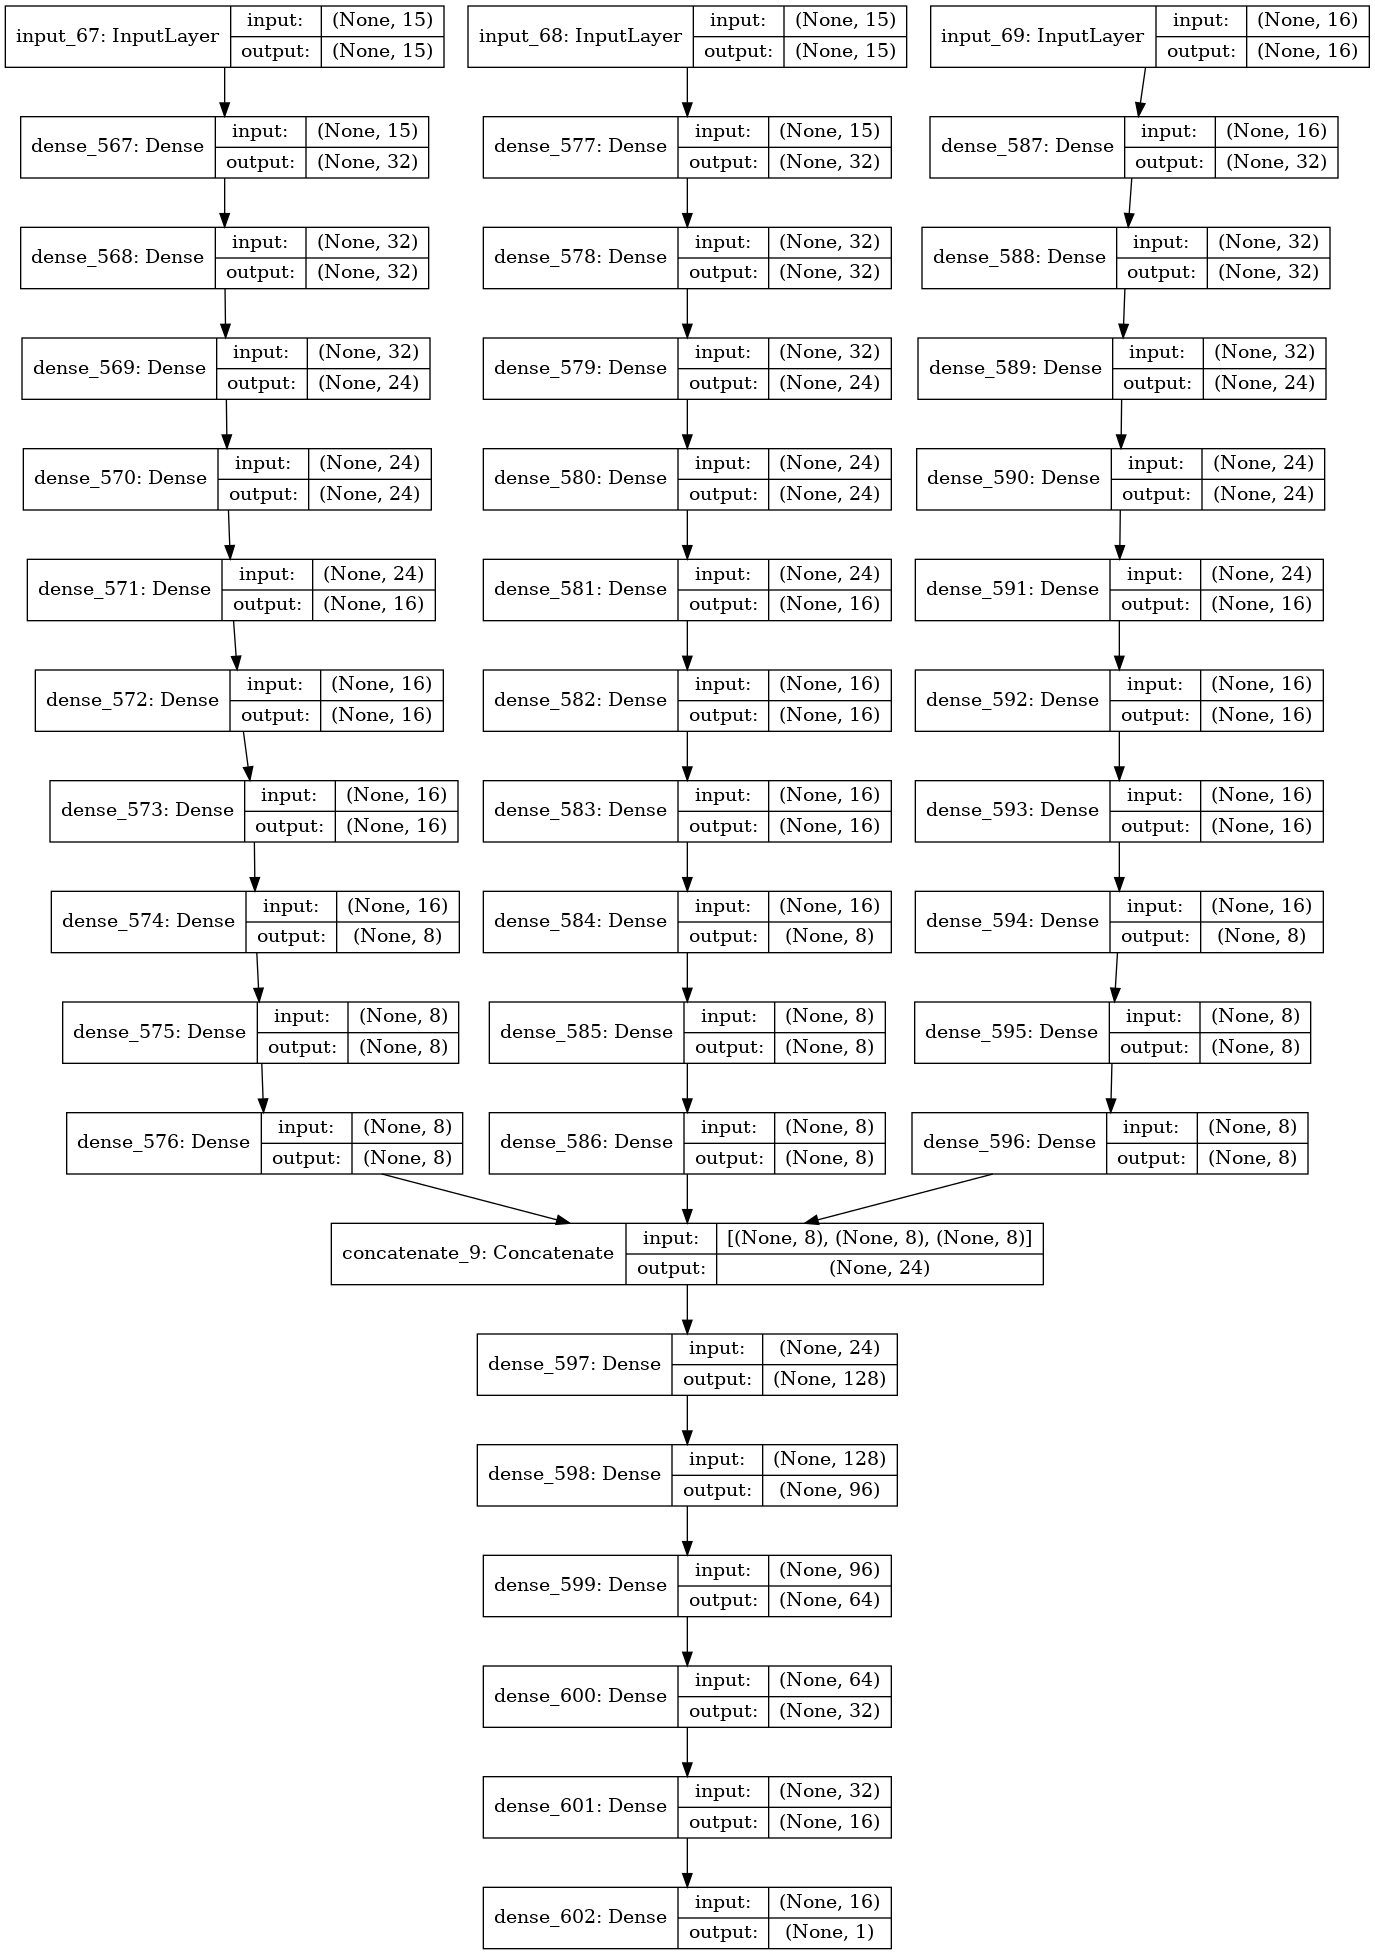

In [105]:
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')
from IPython.display import Image
Image(retina=True, filename='model.png')

In [106]:
# Fit the model
#model.load_weights(filepath)
history = model.fit([rfx_train,varx_train,skx_train], sky_train, 
                    epochs=1500, 
                    shuffle=True,
                    batch_size=20000,
                    callbacks=callbacks_list)


# Before Scaler 
# Epoch 136 loss: 0.6271 - mean_squared_error: 0.2196 - acc: 0.6364

# After Scaler
# Epoch 500 loss: 0.6139 - mean_squared_error: 0.2138 - acc: 0.6511

Epoch 1/1500
6245038/6245038 [==============================] - 47s 8us/step - loss: 0.6486 - mean_squared_error: 0.2292 - acc: 0.6101

Epoch 00001: loss improved from inf to 0.64856, saving model to /home/james/data/Malware/dense_weights.hdf5
Epoch 2/1500
6245038/6245038 [==============================] - 42s 7us/step - loss: 0.6360 - mean_squared_error: 0.2235 - acc: 0.6265

Epoch 00002: loss improved from 0.64856 to 0.63597, saving model to /home/james/data/Malware/dense_weights.hdf5
Epoch 3/1500
6245038/6245038 [==============================] - 42s 7us/step - loss: 0.6343 - mean_squared_error: 0.2228 - acc: 0.6283

Epoch 00003: loss improved from 0.63597 to 0.63435, saving model to /home/james/data/Malware/dense_weights.hdf5
Epoch 4/1500
6245038/6245038 [==============================] - 42s 7us/step - loss: 0.6334 - mean_squared_error: 0.2223 - acc: 0.6295

Epoch 00004: loss improved from 0.63435 to 0.63338, saving model to /home/james/data/Malware/dense_weights.hdf5
Epoch 5/1500

6245038/6245038 [==============================] - 42s 7us/step - loss: 0.6280 - mean_squared_error: 0.2200 - acc: 0.6362

Epoch 00034: loss did not improve from 0.62796
Epoch 35/1500
6245038/6245038 [==============================] - 42s 7us/step - loss: 0.6278 - mean_squared_error: 0.2199 - acc: 0.6362

Epoch 00035: loss improved from 0.62796 to 0.62784, saving model to /home/james/data/Malware/dense_weights.hdf5
Epoch 36/1500
6245038/6245038 [==============================] - 42s 7us/step - loss: 0.6278 - mean_squared_error: 0.2199 - acc: 0.6362

Epoch 00036: loss improved from 0.62784 to 0.62780, saving model to /home/james/data/Malware/dense_weights.hdf5
Epoch 37/1500
6245038/6245038 [==============================] - 42s 7us/step - loss: 0.6278 - mean_squared_error: 0.2199 - acc: 0.6362

Epoch 00037: loss did not improve from 0.62780
Epoch 38/1500
6245038/6245038 [==============================] - 42s 7us/step - loss: 0.6277 - mean_squared_error: 0.2198 - acc: 0.6364

Epoch 00038

6245038/6245038 [==============================] - 42s 7us/step - loss: 0.6262 - mean_squared_error: 0.2192 - acc: 0.6382

Epoch 00069: loss improved from 0.62622 to 0.62618, saving model to /home/james/data/Malware/dense_weights.hdf5
Epoch 70/1500
6245038/6245038 [==============================] - 42s 7us/step - loss: 0.6262 - mean_squared_error: 0.2192 - acc: 0.6381

Epoch 00070: loss improved from 0.62618 to 0.62618, saving model to /home/james/data/Malware/dense_weights.hdf5
Epoch 71/1500
6245038/6245038 [==============================] - 42s 7us/step - loss: 0.6261 - mean_squared_error: 0.2191 - acc: 0.6383

Epoch 00071: loss improved from 0.62618 to 0.62608, saving model to /home/james/data/Malware/dense_weights.hdf5
Epoch 72/1500
6245038/6245038 [==============================] - 42s 7us/step - loss: 0.6261 - mean_squared_error: 0.2191 - acc: 0.6384

Epoch 00072: loss did not improve from 0.62608
Epoch 73/1500
6245038/6245038 [==============================] - 42s 7us/step - los

Epoch 105/1500
6245038/6245038 [==============================] - 42s 7us/step - loss: 0.6250 - mean_squared_error: 0.2186 - acc: 0.6395

Epoch 00105: loss improved from 0.62507 to 0.62500, saving model to /home/james/data/Malware/dense_weights.hdf5
Epoch 106/1500
6245038/6245038 [==============================] - 42s 7us/step - loss: 0.6251 - mean_squared_error: 0.2187 - acc: 0.6395

Epoch 00106: loss did not improve from 0.62500
Epoch 107/1500
6245038/6245038 [==============================] - 42s 7us/step - loss: 0.6250 - mean_squared_error: 0.2186 - acc: 0.6396

Epoch 00107: loss improved from 0.62500 to 0.62498, saving model to /home/james/data/Malware/dense_weights.hdf5
Epoch 108/1500
6245038/6245038 [==============================] - 42s 7us/step - loss: 0.6250 - mean_squared_error: 0.2186 - acc: 0.6395

Epoch 00108: loss did not improve from 0.62498
Epoch 109/1500
6245038/6245038 [==============================] - 42s 7us/step - loss: 0.6250 - mean_squared_error: 0.2186 - acc: 

6245038/6245038 [==============================] - 42s 7us/step - loss: 0.6242 - mean_squared_error: 0.2183 - acc: 0.6404

Epoch 00141: loss did not improve from 0.62423
Epoch 142/1500
6245038/6245038 [==============================] - 42s 7us/step - loss: 0.6242 - mean_squared_error: 0.2183 - acc: 0.6404

Epoch 00142: loss improved from 0.62423 to 0.62418, saving model to /home/james/data/Malware/dense_weights.hdf5
Epoch 143/1500
6245038/6245038 [==============================] - 42s 7us/step - loss: 0.6243 - mean_squared_error: 0.2183 - acc: 0.6404

Epoch 00143: loss did not improve from 0.62418
Epoch 144/1500
6245038/6245038 [==============================] - 42s 7us/step - loss: 0.6242 - mean_squared_error: 0.2183 - acc: 0.6404

Epoch 00144: loss did not improve from 0.62418
Epoch 145/1500
6245038/6245038 [==============================] - 42s 7us/step - loss: 0.6241 - mean_squared_error: 0.2183 - acc: 0.6406

Epoch 00145: loss improved from 0.62418 to 0.62414, saving model to /hom

6245038/6245038 [==============================] - 42s 7us/step - loss: 0.6235 - mean_squared_error: 0.2180 - acc: 0.6412

Epoch 00178: loss improved from 0.62356 to 0.62352, saving model to /home/james/data/Malware/dense_weights.hdf5
Epoch 179/1500
6245038/6245038 [==============================] - 44s 7us/step - loss: 0.6235 - mean_squared_error: 0.2180 - acc: 0.6412

Epoch 00179: loss did not improve from 0.62352
Epoch 180/1500
6245038/6245038 [==============================] - 45s 7us/step - loss: 0.6235 - mean_squared_error: 0.2180 - acc: 0.6412

Epoch 00180: loss improved from 0.62352 to 0.62351, saving model to /home/james/data/Malware/dense_weights.hdf5
Epoch 181/1500
6245038/6245038 [==============================] - 43s 7us/step - loss: 0.6235 - mean_squared_error: 0.2180 - acc: 0.6412

Epoch 00181: loss improved from 0.62351 to 0.62351, saving model to /home/james/data/Malware/dense_weights.hdf5
Epoch 182/1500
6245038/6245038 [==============================] - 43s 7us/step -

6245038/6245038 [==============================] - 42s 7us/step - loss: 0.6230 - mean_squared_error: 0.2177 - acc: 0.6418

Epoch 00216: loss improved from 0.62301 to 0.62296, saving model to /home/james/data/Malware/dense_weights.hdf5
Epoch 217/1500
6245038/6245038 [==============================] - 45s 7us/step - loss: 0.6230 - mean_squared_error: 0.2177 - acc: 0.6418

Epoch 00217: loss did not improve from 0.62296
Epoch 218/1500
6245038/6245038 [==============================] - 44s 7us/step - loss: 0.6230 - mean_squared_error: 0.2177 - acc: 0.6420

Epoch 00218: loss improved from 0.62296 to 0.62296, saving model to /home/james/data/Malware/dense_weights.hdf5
Epoch 219/1500
6245038/6245038 [==============================] - 44s 7us/step - loss: 0.6230 - mean_squared_error: 0.2177 - acc: 0.6418

Epoch 00219: loss did not improve from 0.62296
Epoch 220/1500
6245038/6245038 [==============================] - 42s 7us/step - loss: 0.6229 - mean_squared_error: 0.2177 - acc: 0.6420

Epoch 0

KeyboardInterrupt: 

In [107]:
model.load_weights(filepath)

predictions = model.predict([rfx_test,varx_test,skx_test])

In [108]:
y_np = sky_test.to_numpy()
roc_score = metrics.roc_auc_score(y_np,predictions)
print(roc_score)


# loss: 0.6139 - mean_squared_error: 0.2138 - acc: 0.6511
# ROC: .6955

# loss: 0.6226 - mean_squared_error: 0.2176 - acc: 0.6421
# ROC: 0.6962117395456469

0.6962117395456469
